In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

In [2]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [3]:
BATCH_SIZE = 3
train_dataset = train.flow_from_directory('train/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')
test_dataset = test.flow_from_directory('test/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')

Found 91 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 99, 99, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 32)        0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
EPOCH = 10
model_fit = model.fit(train_dataset, epochs=EPOCH, validation_data=test_dataset) 

Epoch 1/10
31/31 [==============================] - 26s 765ms/step - loss: 1.3777 - accuracy: 0.3516 - val_loss: 0.8583 - val_accuracy: 0.6667
Epoch 2/10
31/31 [==============================] - 20s 649ms/step - loss: 0.7752 - accuracy: 0.5604 - val_loss: 0.5792 - val_accuracy: 0.7436
Epoch 3/10
31/31 [==============================] - 20s 656ms/step - loss: 0.5389 - accuracy: 0.6593 - val_loss: 0.3492 - val_accuracy: 1.0000
Epoch 4/10
31/31 [==============================] - 20s 656ms/step - loss: 0.3593 - accuracy: 0.9780 - val_loss: 0.3156 - val_accuracy: 1.0000
Epoch 5/10
31/31 [==============================] - 20s 656ms/step - loss: 0.2091 - accuracy: 0.9670 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
31/31 [==============================] - 20s 658ms/step - loss: 0.1580 - accuracy: 0.9451 - val_loss: 4.5381e-04 - val_accuracy: 1.0000
Epoch 7/10
31/31 [==============================] - 20s 649ms/step - loss: 0.0359 - accuracy: 0.9780 - val_loss: 1.7809e-04 - val_accuracy

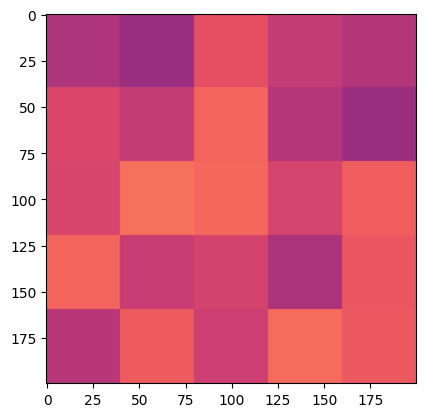

1/1 [==============================] - 0s 61ms/step
[[0. 1. 0.]]


In [27]:
image = tf.keras.preprocessing.image
dir_val = 'val'
model_input_shape = (200, 200)

# List all files in the 'val' directory
val_files = os.listdir(dir_val)

# Pick a random image file from the list
random_image_filename = random.choice(val_files)

# Load and resize the randomly selected image
img_path = os.path.join(dir_val, random_image_filename)
img = image.load_img(img_path, target_size=model_input_shape)
plt.imshow(img)
plt.show()

# Convert the image to a numpy array
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Make predictions
val = model.predict(X)

print(val)

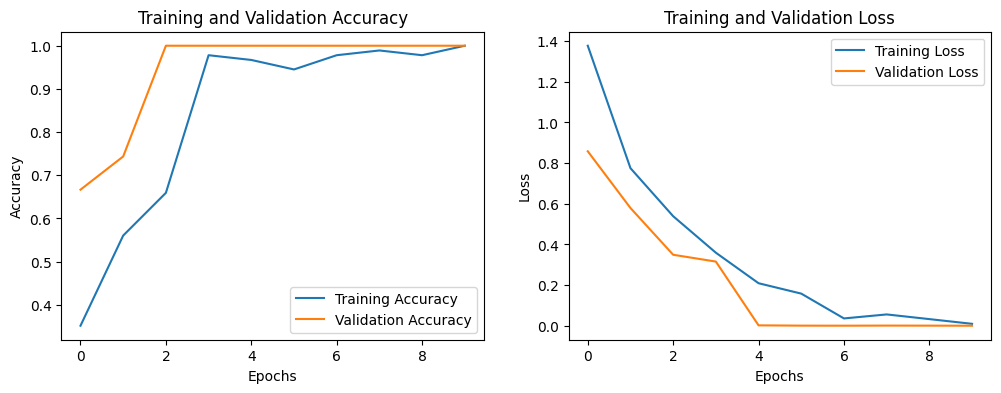

In [20]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()